## 1 Logistic regression

In [14]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
# Removes any rows with missing values
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
# Make a copy to avoid the warning
df_filtered = df[df['species'].isin(selected_classes)].copy() 

# Initialize the LabelEncoder
le = LabelEncoder ()    # converts categorical labels into numerical form

# Encode the species column
y_encoded = le . fit_transform ( df_filtered ['species'])
df_filtered ['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print ( df_filtered [[ 'species', 'class_encoded']])

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


saga solver

In [16]:
# Prepare feature variables and target variable
y = df_filtered['class_encoded']  # Target variable
X = df_filtered.drop(['species', 'island', 'sex', 'class_encoded'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model using the 'saga' solver
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print model coefficients and intercept
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)


Accuracy: 0.5813953488372093
Coefficients: [[ 2.74880385e-03 -8.18236932e-05  4.64959875e-04 -2.86578455e-04]]
Intercept: [-8.49898519e-06]


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


liblinear solver

In [17]:
# Prepare feature variables and target variable
y = df_filtered['class_encoded']  # Target variable
X = df_filtered.drop(['species', 'island', 'sex', 'class_encoded'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model using the 'saga' solver
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print model coefficients and intercept
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)


Accuracy: 1.0
Coefficients: [[ 1.5997544  -1.43222015 -0.15123497 -0.00401141]]
Intercept: [-0.07601213]


feature scaling with Standard Scaler

In [23]:
from sklearn.preprocessing import StandardScaler

# Prepare feature variables and target variable
y = df_filtered['class_encoded']
X = df_filtered.drop(['species', 'island', 'sex', 'class_encoded'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize scalers and solvers
scalers = [None, StandardScaler()]
solvers = ['liblinear', 'saga']

results = {}

for scaler in scalers:
    if scaler:
        # Apply scaling
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    for solver in solvers:
        # Train the logistic regression model
        logreg = LogisticRegression(solver=solver)
        logreg.fit(X_train_scaled, y_train)
        
        # Predict on the testing data
        y_pred = logreg.predict(X_test_scaled)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        results[f"Solver: {solver}, Scaler: {'StandardScaler' if scaler else 'None'}"] = accuracy

# Print the results in a tabular chart
print("Accuracy Scores:")
for key, value in results.items():
    print(key, ':', value)

Accuracy Scores:
Solver: liblinear, Scaler: None : 1.0
Solver: saga, Scaler: None : 0.5813953488372093
Solver: liblinear, Scaler: StandardScaler : 0.9767441860465116
Solver: saga, Scaler: StandardScaler : 0.9767441860465116


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [24]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)  # Remove rows with missing values

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()  # Make a copy

# One-Hot Encoding for categorical variables 
X = pd.get_dummies(df_filtered.drop(columns=['species']), drop_first=True)

# Encode the target variable (species) using LabelEncoder
y_encoded = pd.get_dummies(df_filtered['species'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logreg = LogisticRegression(solver='saga', max_iter=5000)
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the coefficients and intercept
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)


Accuracy: 0.7209302325581395
Coefficients: [[ 0.1104782  -0.00669806 -0.01178123 -0.00084871  0.00813636 -0.00471173
   0.00061285]]
Intercept: [-0.00057597]


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## 2 Logistic regression on real world data

Load the Dataset

In [2]:
import pandas as pd

# Load the Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

df = pd.read_csv(url, header=None, names=columns)

# Replace missing values (represented by '?') with NaN and convert to numeric
df.replace('?', float('nan'), inplace=True)
df = df.apply(pd.to_numeric)

# Drop rows with missing values (you can also use imputation if needed)
df = df.dropna()

# Display dataset information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB
None


Calculate the Correlation Matrix

In [3]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex      -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp        0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps  0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol      0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs       0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg   0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalach  -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang     0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak   0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope     0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca        0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal      0.126586  0.383652  0.268500  0.138183  0.010859  0.06

Visualize the Correlation Matrix

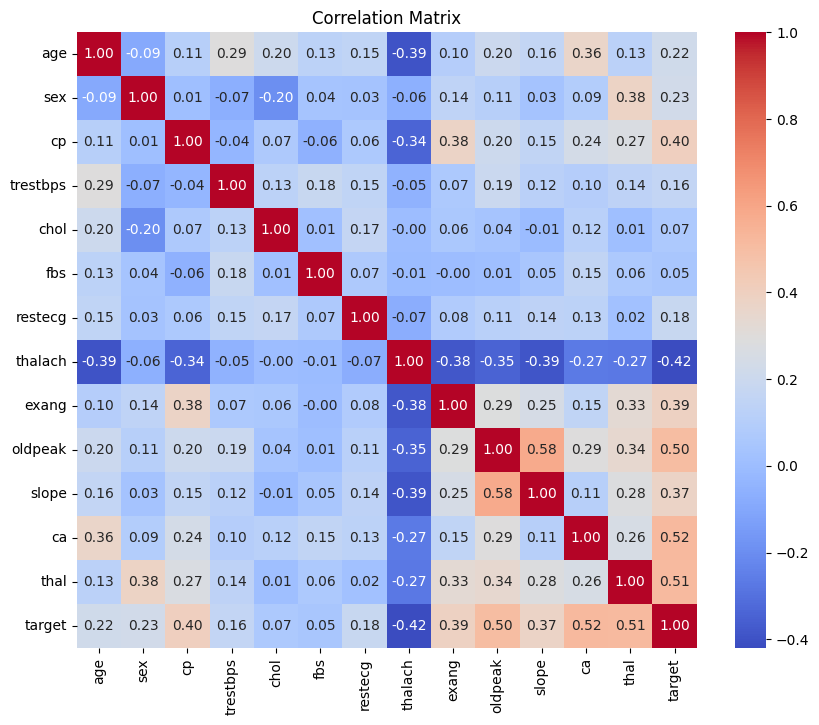

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


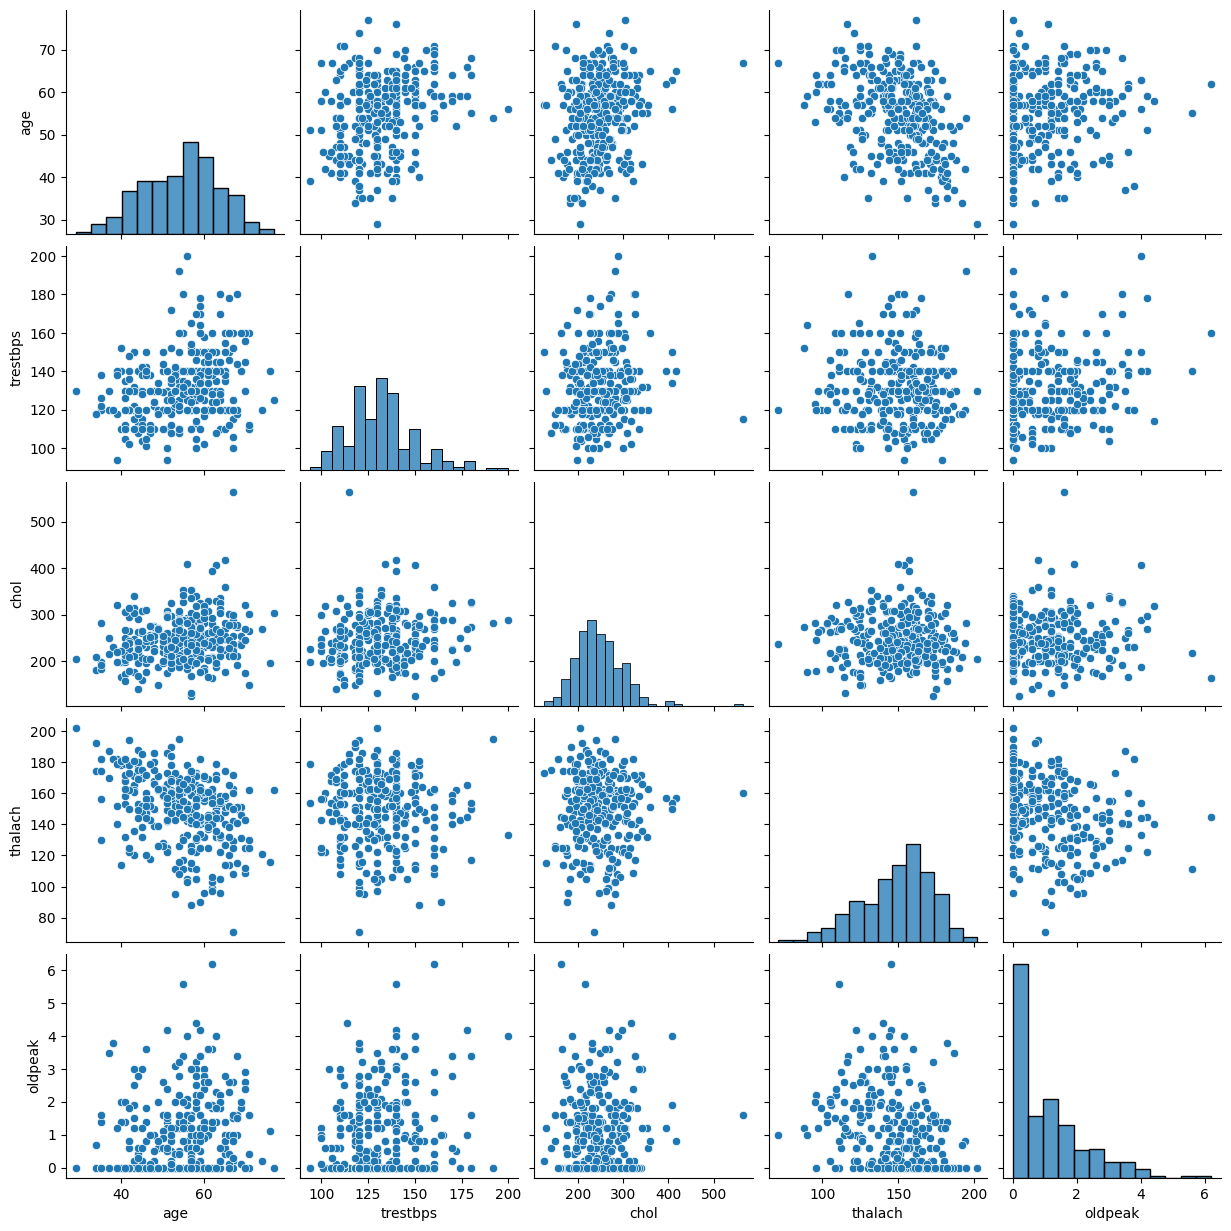

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select up to 5 features for pair plotting
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create pair plots using sns.pairplot with hue based on the target variable
sns.pairplot(df[selected_features ])
plt.show()


Fit a Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the feature matrix X and target vector y
X = df.drop(columns='target')  # Features 
y = df['target']  # Target 

# Convert the target to a binary classification (0 = no disease, 1 = disease)
y = y.apply(lambda x: 1 if x > 0 else 0)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Increasing max_iter to ensure convergence

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model: accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Display classification report for more detailed metrics (precision, recall, f1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.88
Confusion Matrix:
 [[32  4]
 [ 3 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



Fit the Logistic Regression Model with statsmodels

In [9]:
import pandas as pd
import statsmodels.api as sm

# Convert target to binary (0: no heart disease, 1: presence of heart disease)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Define the feature matrix X and target vector y
X = df.drop(columns='target')  # All columns except 'target'
y = df['target']  # Target column

# Add a constant to the feature matrix (for intercept)
X = sm.add_constant(X)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.344594
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  297
Model:                          Logit   Df Residuals:                      283
Method:                           MLE   Df Model:                           13
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.5007
Time:                        18:33:20   Log-Likelihood:                -102.34
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 1.136e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3720      2.879     -2.560      0.010     -13.016      -1.728
age           -0.0142      0.

## 3 Logistic regression First/Second-Order Methods

Generate data

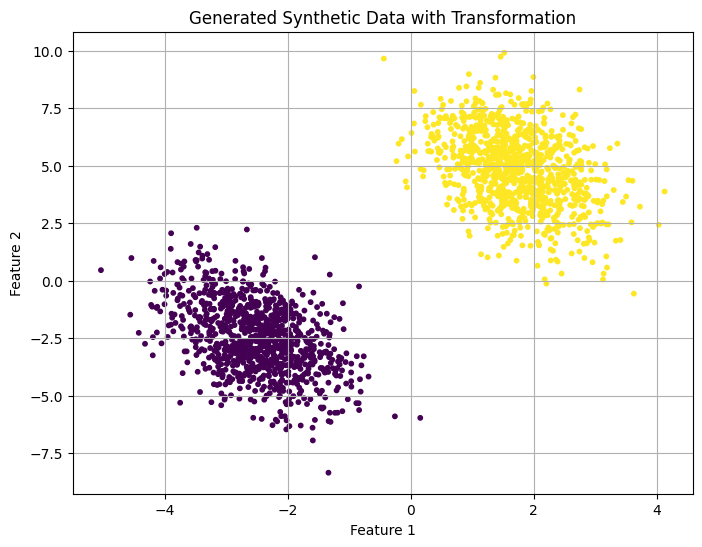

In [27]:
import numpy as np
import matplotlib . pyplot as plt
import numpy as np
from sklearn . datasets import make_blobs

# Generate synthetic data
np . random . seed (0)
centers = [[ -5 , 0] , [5 , 1.5]]
X , y = make_blobs ( n_samples =2000 , centers = centers , random_state =5)
transformation = [[0.5 , 0.5] , [ -0.5 , 1.5]]
X = np . dot (X , transformation )

#Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)  # Plot the blobs
plt.title('Generated Synthetic Data with Transformation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

Implement Batch Gradient Descent

Iteration 1: Loss = 0.6931
Iteration 2: Loss = 0.6499
Iteration 3: Loss = 0.6109
Iteration 4: Loss = 0.5756
Iteration 5: Loss = 0.5437
Iteration 6: Loss = 0.5148
Iteration 7: Loss = 0.4885
Iteration 8: Loss = 0.4646
Iteration 9: Loss = 0.4428
Iteration 10: Loss = 0.4228
Iteration 11: Loss = 0.4045
Iteration 12: Loss = 0.3877
Iteration 13: Loss = 0.3721
Iteration 14: Loss = 0.3578
Iteration 15: Loss = 0.3445
Iteration 16: Loss = 0.3321
Iteration 17: Loss = 0.3207
Iteration 18: Loss = 0.3100
Iteration 19: Loss = 0.3000
Iteration 20: Loss = 0.2906


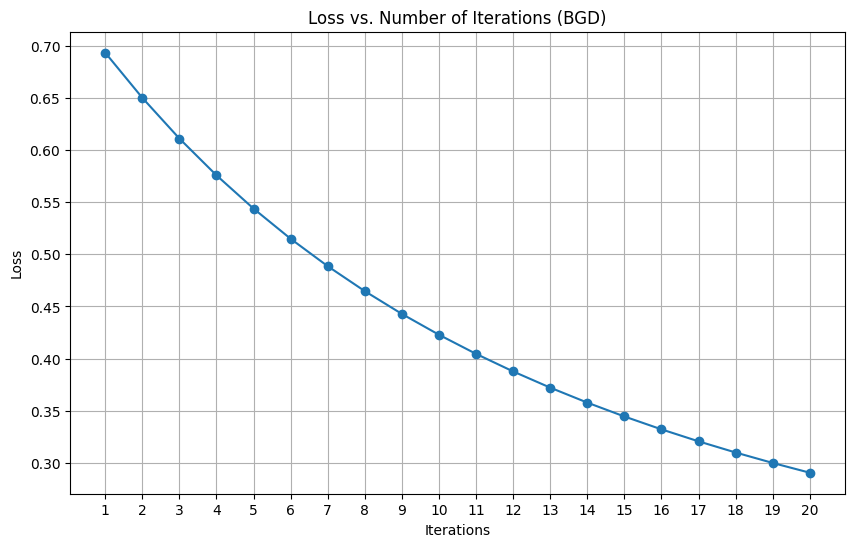

Final weights: [-0.0049357   0.15122723  0.23719972]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Transform the data
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add bias term to feature matrix
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Adding a bias term

# Initialize weights
weights = np.zeros(X.shape[1])  # Initialize weights to zeros
learning_rate = 0.01
num_iterations = 20

# To store the loss values for plotting
loss_values = []

# Batch Gradient Descent
for i in range(num_iterations):
    # Compute linear combination
    linear_output = np.dot(X, weights)
    # Sigmoid function
    predictions = 1 / (1 + np.exp(-linear_output))
    
    # Calculate the gradient
    gradient = np.dot(X.T, (predictions - y)) / y.size
    
    # Update the weights
    weights -= learning_rate * gradient
    
    # Calculate and store loss
    loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
    loss_values.append(loss)  # Append the loss for the current iteration
    print(f"Iteration {i + 1}: Loss = {loss:.4f}")

# Step 4: Plotting the loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), loss_values, marker='o')
plt.title('Loss vs. Number of Iterations (BGD)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.xticks(range(1, num_iterations + 1))
plt.grid()
plt.show()

# Final weights
print("Final weights:", weights)

Implement Stochastic Gradient Descent

Iteration 1: Loss = 0.0068
Iteration 2: Loss = 0.0037
Iteration 3: Loss = 0.0026
Iteration 4: Loss = 0.0021
Iteration 5: Loss = 0.0017
Iteration 6: Loss = 0.0015
Iteration 7: Loss = 0.0013
Iteration 8: Loss = 0.0011
Iteration 9: Loss = 0.0010
Iteration 10: Loss = 0.0009
Iteration 11: Loss = 0.0009
Iteration 12: Loss = 0.0008
Iteration 13: Loss = 0.0008
Iteration 14: Loss = 0.0007
Iteration 15: Loss = 0.0007
Iteration 16: Loss = 0.0006
Iteration 17: Loss = 0.0006
Iteration 18: Loss = 0.0006
Iteration 19: Loss = 0.0005
Iteration 20: Loss = 0.0005


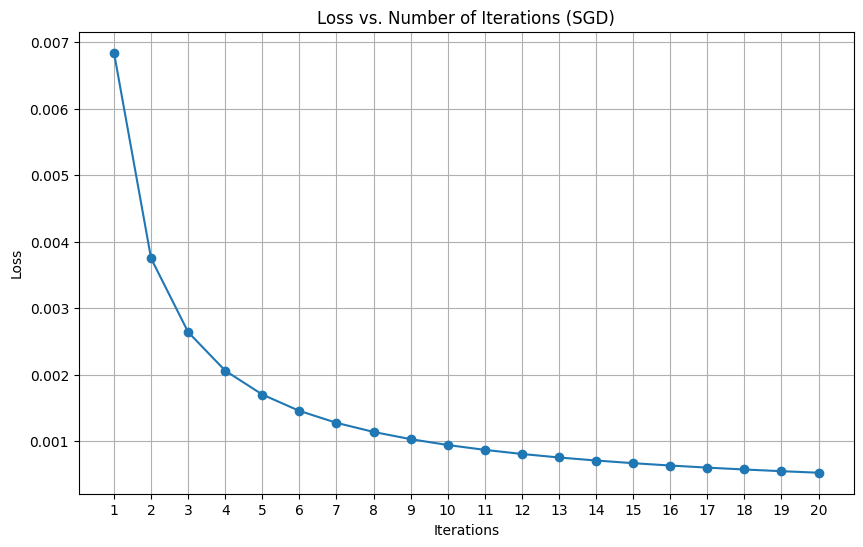

Final weights: [-0.38483036  2.15377528  1.49698301]


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Transform the data
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add bias term to feature matrix
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Adding a bias term

# Initialize weights
weights = np.zeros(X.shape[1])  # Initialize weights to zeros
learning_rate = 0.01
num_iterations = 20

# To store the loss values for plotting
loss_values = []

# Stochastic Gradient Descent
for i in range(num_iterations):
    for j in range(X.shape[0]):
        # Select one sample
        X_i = X[j:j+1]
        y_i = y[j]

        # Compute linear combination
        linear_output = np.dot(X_i, weights)
        # Sigmoid function
        prediction = 1 / (1 + np.exp(-linear_output))
        
        # Calculate the gradient for the single sample
        gradient = X_i.T * (prediction - y_i)
        
        # Update the weights
        weights -= learning_rate * gradient.flatten()
    
    # Calculate and store loss for the entire dataset after each iteration
    linear_output = np.dot(X, weights)
    predictions = 1 / (1 + np.exp(-linear_output))
    loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
    loss_values.append(loss)  # Append the loss for the current iteration
    print(f"Iteration {i + 1}: Loss = {loss:.4f}")

# Step 4: Plotting the loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), loss_values, marker='o')
plt.title('Loss vs. Number of Iterations (SGD)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.xticks(range(1, num_iterations + 1))
plt.grid()
plt.show()

# Final weights
print("Final weights:", weights)


Newton's Method

Iteration 1: Loss = 0.6931
Iteration 2: Loss = 0.1452
Iteration 3: Loss = 0.0528
Iteration 4: Loss = 0.0203
Iteration 5: Loss = 0.0080
Iteration 6: Loss = 0.0032
Iteration 7: Loss = 0.0013
Iteration 8: Loss = 0.0005
Iteration 9: Loss = 0.0002
Iteration 10: Loss = 0.0001
Iteration 11: Loss = 0.0000
Iteration 12: Loss = 0.0000
Iteration 13: Loss = 0.0000
Iteration 14: Loss = 0.0000
Iteration 15: Loss = 0.0000
Iteration 16: Loss = 0.0000
Iteration 17: Loss = 0.0000
Iteration 18: Loss = 0.0000
Iteration 19: Loss = 0.0000
Iteration 20: Loss = 0.0000


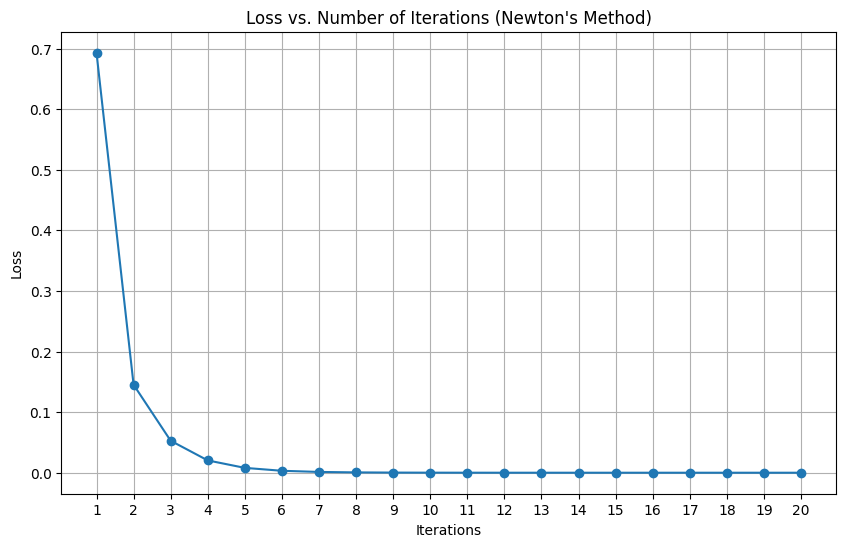

Final weights: [-2.93259517 10.56207842  4.32766252]


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Transform the data
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add bias term to feature matrix
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Adding a bias term

# Initialize weights
weights = np.zeros(X.shape[1])  # Initialize weights to zeros
num_iterations = 20

# To store the loss values for plotting
loss_values = []

# Newton's Method
for i in range(num_iterations):
    # Compute linear combination
    linear_output = np.dot(X, weights)
    # Sigmoid function
    predictions = 1 / (1 + np.exp(-linear_output))
    
    # Calculate the gradient
    gradient = np.dot(X.T, (predictions - y)) / y.size
    
    # Calculate the Hessian
    diag = predictions * (1 - predictions)  # Derivative of sigmoid
    H = np.dot(X.T, X * diag[:, np.newaxis]) / y.size  # Hessian matrix

    # Update the weights using Newton's method
    weights -= np.linalg.inv(H).dot(gradient)
    
    # Calculate and store loss for the entire dataset
    loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
    loss_values.append(loss)  # Append the loss for the current iteration
    print(f"Iteration {i + 1}: Loss = {loss:.4f}")

# Step 4: Plotting the loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), loss_values, marker='o')
plt.title('Loss vs. Number of Iterations (Newton\'s Method)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.xticks(range(1, num_iterations + 1))
plt.grid()
plt.show()

# Final weights
print("Final weights:", weights)


comparision

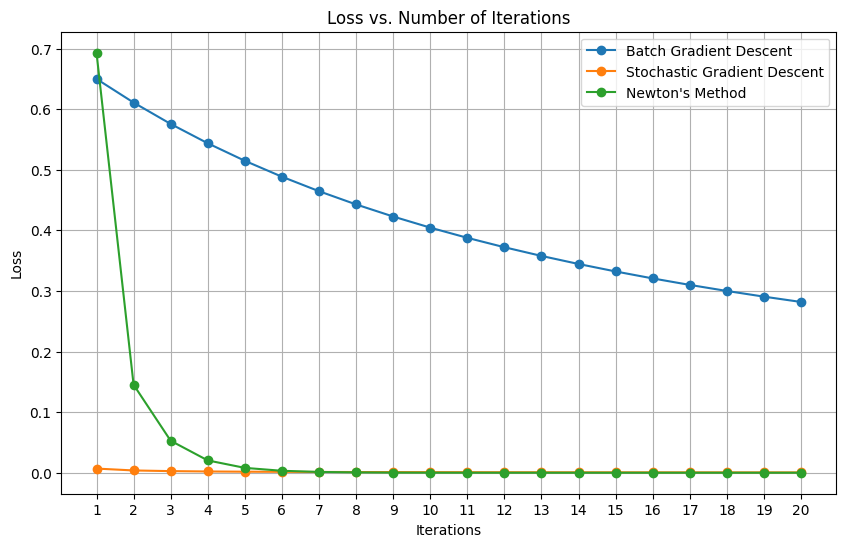

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Transform the data
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add bias term to feature matrix
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Adding a bias term

# Function to compute loss
def compute_loss(X, y, weights):
    linear_output = np.dot(X, weights)
    predictions = 1 / (1 + np.exp(-linear_output))
    return -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))

# Initialize parameters
num_iterations = 20
learning_rate = 0.01

# Batch Gradient Descent
weights_bg = np.zeros(X.shape[1])
loss_values_bg = []

for i in range(num_iterations):
    linear_output = np.dot(X, weights_bg)
    predictions = 1 / (1 + np.exp(-linear_output))
    gradient = np.dot(X.T, (predictions - y)) / y.size
    weights_bg -= learning_rate * gradient
    loss_bg = compute_loss(X, y, weights_bg)
    loss_values_bg.append(loss_bg)

# Stochastic Gradient Descent
weights_sgd = np.zeros(X.shape[1])
loss_values_sgd = []

for i in range(num_iterations):
    for j in range(X.shape[0]):
        X_i = X[j:j + 1]
        y_i = y[j]
        linear_output = np.dot(X_i, weights_sgd)
        prediction = 1 / (1 + np.exp(-linear_output))
        gradient = X_i.T * (prediction - y_i)
        weights_sgd -= learning_rate * gradient.flatten()
    
    loss_sgd = compute_loss(X, y, weights_sgd)
    loss_values_sgd.append(loss_sgd)

# Newton's Method
weights_newton = np.zeros(X.shape[1])
loss_values_newton = []

weights = np.zeros(X.shape[1])
for i in range(num_iterations):
    linear_output = np.dot(X, weights)
    predictions = 1 / (1 + np.exp(-linear_output))
    gradient = np.dot(X.T, (predictions - y)) / y.size
    diag = predictions * (1 - predictions)  
    H = np.dot(X.T, X * diag[:, np.newaxis]) / y.size  
    weights -= np.linalg.inv(H).dot(gradient)
    loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
    loss_values_newton.append(loss)  

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), loss_values_bg, marker='o', label='Batch Gradient Descent')
plt.plot(range(1, num_iterations + 1), loss_values_sgd, marker='o', label='Stochastic Gradient Descent')
plt.plot(range(1, num_iterations + 1), loss_values_newton, marker='o', label='Newton\'s Method')
plt.title('Loss vs. Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.xticks(range(1, num_iterations + 1))
plt.grid()
plt.legend()
plt.show()


Iteration 1: Loss = 0.6931
Iteration 2: Loss = 0.6865
Iteration 3: Loss = 0.6804
Iteration 4: Loss = 0.6748
Iteration 5: Loss = 0.6695
Iteration 6: Loss = 0.6647
Iteration 7: Loss = 0.6602
Iteration 8: Loss = 0.6561
Iteration 9: Loss = 0.6522
Iteration 10: Loss = 0.6487
Iteration 11: Loss = 0.6453
Iteration 12: Loss = 0.6422
Iteration 13: Loss = 0.6393
Iteration 14: Loss = 0.6366
Iteration 15: Loss = 0.6340
Iteration 16: Loss = 0.6316
Iteration 17: Loss = 0.6294
Iteration 18: Loss = 0.6273
Iteration 19: Loss = 0.6253
Iteration 20: Loss = 0.6234


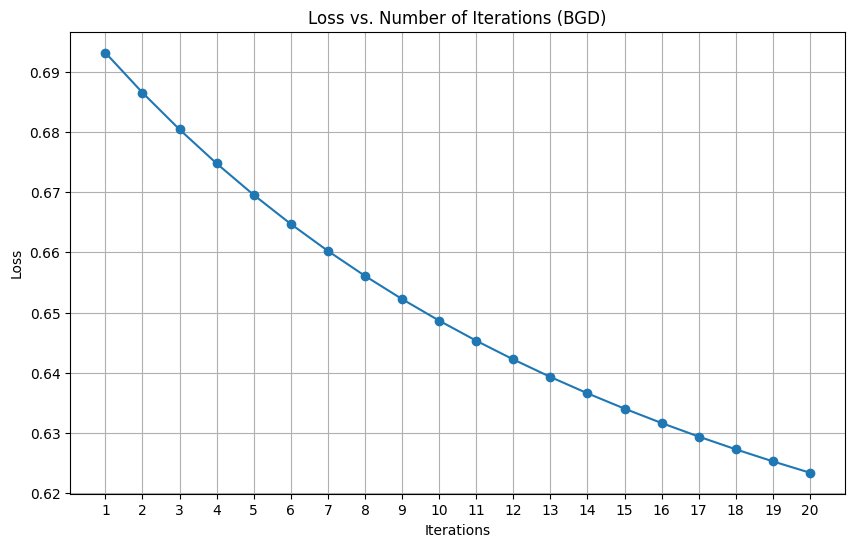

Final weights: [-0.00970213 -0.00304826  0.11732468]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers =  [[3, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Transform the data
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Step 1: Add bias term to feature matrix
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Adding a bias term

# Step 2: Initialize weights
weights = np.zeros(X.shape[1])  # Initialize weights to zeros
learning_rate = 0.01
num_iterations = 20

# To store the loss values for plotting
loss_values = []

# Step 3: Batch Gradient Descent
for i in range(num_iterations):
    # Compute linear combination
    linear_output = np.dot(X, weights)
    # Sigmoid function
    predictions = 1 / (1 + np.exp(-linear_output))
    
    # Calculate the gradient
    gradient = np.dot(X.T, (predictions - y)) / y.size
    
    # Update the weights
    weights -= learning_rate * gradient
    
    # Calculate and store loss
    loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
    loss_values.append(loss)  # Append the loss for the current iteration
    print(f"Iteration {i + 1}: Loss = {loss:.4f}")

# Step 4: Plotting the loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), loss_values, marker='o')
plt.title('Loss vs. Number of Iterations (BGD)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.xticks(range(1, num_iterations + 1))
plt.grid()
plt.show()

# Final weights
print("Final weights:", weights)
 